In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [3]:
data.shape


(381109, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


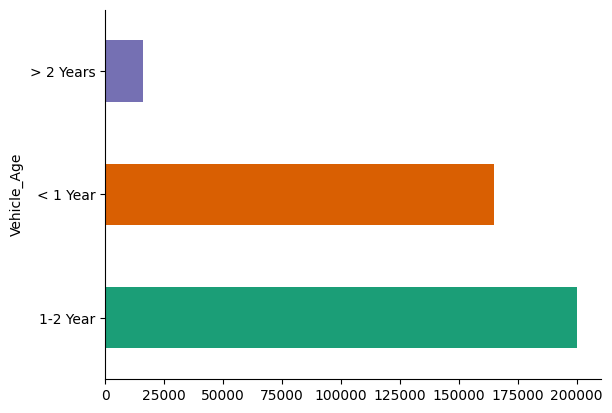

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Vehicle_Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

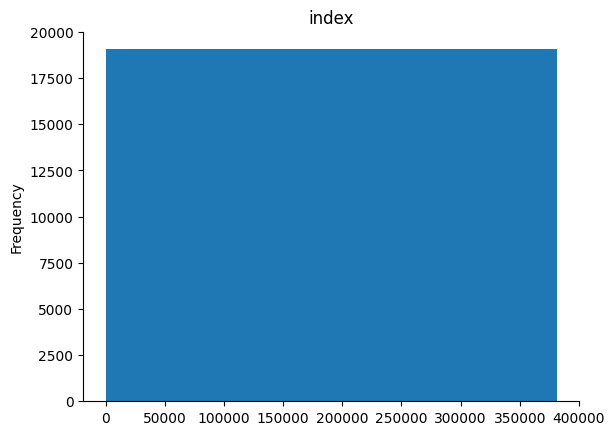

In [9]:
from matplotlib import pyplot as plt
data['id'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data.columns




Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

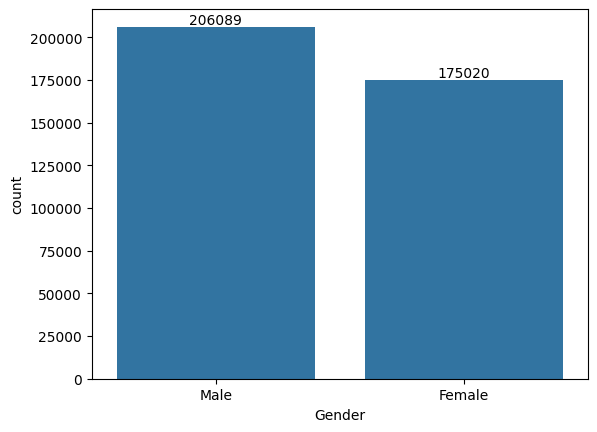

In [12]:
from itertools import count
ax = sns.countplot(x="Gender", data= data)

for bars in ax.containers:
  ax.bar_label(bars)

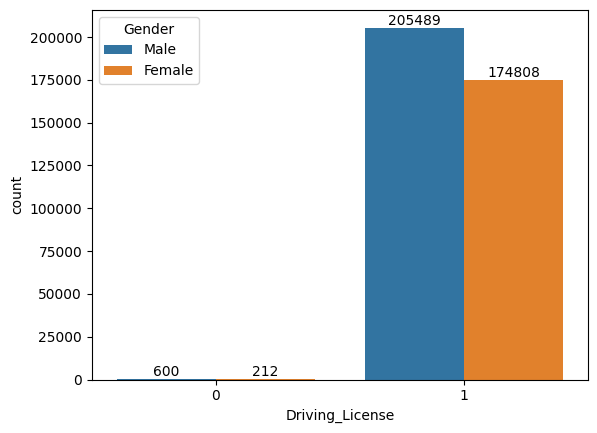

In [13]:
plot = sns.countplot(x="Driving_License", data= data,hue="Gender")
for bars in plot.containers:
  plot.bar_label(bars)


<Axes: xlabel='Age', ylabel='count'>

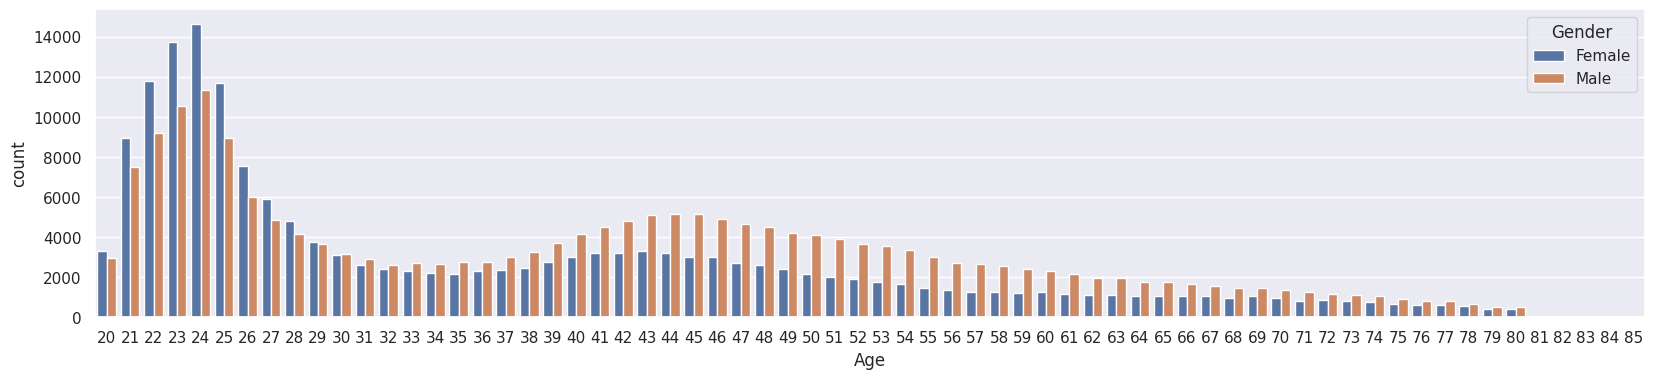

In [14]:
sns.set(rc={'figure.figsize': (20,4)})
sns.countplot(x= "Age", data = data, hue="Gender")

Analysis show that Age group between 21 to 26 has greater no. of female count.After 38 male count increases.

In [15]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

<Axes: xlabel='Region_Code', ylabel='count'>

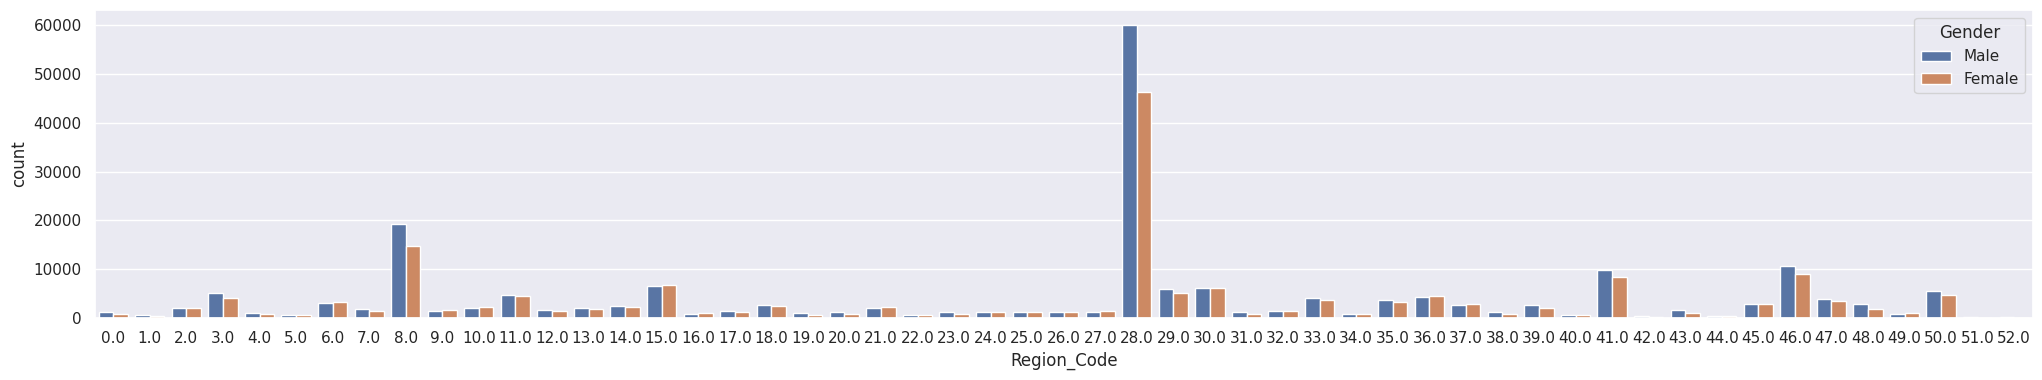

In [16]:
sns.set(rc={'figure.figsize': (25,4)})
sns.countplot(x= "Region_Code", data = data,hue = "Gender")

Many People count get from region code 8,28,46.

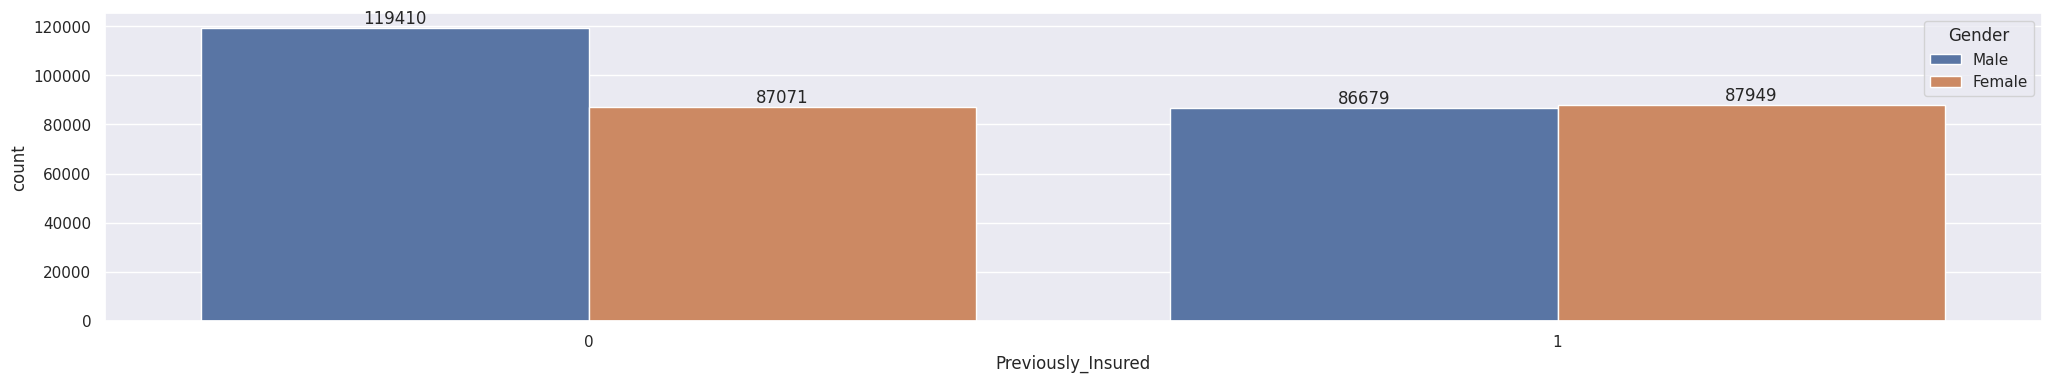

In [17]:
plot = sns.countplot(x="Previously_Insured", data= data,hue="Gender")
for bars in plot.containers:
  plot.bar_label(bars)


we will going to use logistic regression i.e. binary classification

In [18]:
enc = LabelEncoder()
for i in (1,6,7):
  data.iloc[:,i]= enc.fit_transform(data.iloc[:,i])

data.head()



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [19]:
data.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,-0.001345,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.001345,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042


In [20]:
y = data.Response
x = data.iloc[:,[2,5,6,7,8,10,11]]
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test,y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 10)

In [23]:
#Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape

(266776, 7)

In [25]:
X_test.shape

(114333, 7)

In [26]:
X_train

array([[ 0.26779065, -0.92005141, -0.89306322, ..., -0.25136503,
        -0.81794992, -0.37425059],
       [ 0.589891  ,  1.08689579, -0.89306322, ..., -1.62557377,
         1.71681595, -0.37425059],
       [ 0.71873113, -0.92005141,  2.5698665 , ...,  1.98122947,
         1.31029689, -0.37425059],
       ...,
       [ 0.39663079, -0.92005141, -0.89306322, ..., -1.62557377,
         1.22660179, -0.37425059],
       [-0.8917706 ,  1.08689579,  0.83840164, ..., -0.60603334,
         0.29399925, -0.37425059],
       [ 1.87829239, -0.92005141,  2.5698665 , ...,  1.61486305,
         0.87986495, -0.37425059]])

In [27]:
X_test

array([[ 2.52249308, -0.92005141, -0.89306322, ...,  0.29681692,
         1.07116804, -0.37425059],
       [-0.82735053, -0.92005141,  0.83840164, ...,  1.1382084 ,
         1.20268891,  2.67200648],
       [-1.21387095,  1.08689579,  0.83840164, ..., -0.02316443,
         0.37769435, -0.37425059],
       ...,
       [ 2.00713252, -0.92005141, -0.89306322, ..., -1.62557377,
         0.27008637, -0.37425059],
       [-1.08503081, -0.92005141,  0.83840164, ...,  1.23935929,
         1.16681958, -0.37425059],
       [ 1.04083148,  1.08689579, -0.89306322, ...,  0.35082614,
         1.21464535, -0.37425059]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
#Predicting the test data
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [31]:
model.score(X_test,y_test)

1.0

In [32]:

model.predict_proba(X_test)

array([[9.99978933e-01, 2.10666791e-05],
       [6.98811861e-05, 9.99930119e-01],
       [9.99997843e-01, 2.15731918e-06],
       ...,
       [9.99979978e-01, 2.00218863e-05],
       [9.99982808e-01, 1.71922819e-05],
       [9.99997414e-01, 2.58632744e-06]])

In [33]:
print(accuracy_score(y_test,model.predict(X_test)))

print(classification_report(y_test,model.predict(X_test)))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100398
           1       1.00      1.00      1.00     13935

    accuracy                           1.00    114333
   macro avg       1.00      1.00      1.00    114333
weighted avg       1.00      1.00      1.00    114333



In [34]:
confusion_matrix(y_test,model.predict(X_test))

array([[100398,      0],
       [     0,  13935]])